# Prática Independente - Modelagem estatística II.


### Data fields:

#### Aqui está uma breve descrição dos dados.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale    

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Tamanho padrões das figuras e a fonte de seus textos neste notebook
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

#Funções que serão utilizadas ao longo do notebook

In [27]:
def EDA (df):
    """Função que retona algumas métricas de análise estatística descritiva personalizadas"""
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    # Outro ponto para ser verificado, porque para criar a coluna com a quantidade de valores unicos por coluna
    # Não utilizei a função df.unique() 
    colunas = sorted(df.columns.tolist(), key=str.lower, reverse=False)
    eda_df['Amount_Unique'] = filtered_result = list(map(lambda x: len(df[x].unique().tolist()), colunas))
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    return pd.DataFrame(eda_df)

In [28]:
def normal(df, col, threshold = 0.05):

  """Função que retorna se uma distribuição é ou não normal"""
  try:
    zscore, p_value = stats.normaltest(df[col])
    #print('p_value:', p_value)
    #print("stats.normaltest(df['{}']):".format(col), stats.normaltest(df[col]))
        
    if p_value < threshold:
      result = 'A distribuição não é normal'
    else:
      result = 'A distribuição é normal' 
  except:
    zscore = p_value = np.nan
    result = 'Não aplicável'
  return result

#### Exercício 1 - Faça a leitura do arquivo `IowaHousePricing.csv` e realize uma seleção dos atributos mais relevantes para sua modelização, considerando as matrizes de correlação em mapas de calor, gráficos de `pairplot`, de caixa e de violinos.

In [29]:
dados= pd.read_csv('IowaHousePricing.csv')
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Vamos pegar o tamanho total da área construída da casa e condensar 4 variáveis em uma só:

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet

OBS -> Vamos considerar que o tamanho da garagem não está incluído no tamanho do primeiro andar da casa, mas nada sobre isso é indicado na descrição das variáveis.

In [30]:
dados['TotalBuiltArea'] = dados['1stFlrSF'] + dados['2ndFlrSF'] + dados['GrLivArea'] + dados['GarageArea']

Vamos destacar as variáveis que possuam de 50% de correlação linear para cima com a variável resposta (SalePrice)

In [31]:
dados_corr= dados.corr()[dados.corr()>= 0.50]['SalePrice'].dropna()

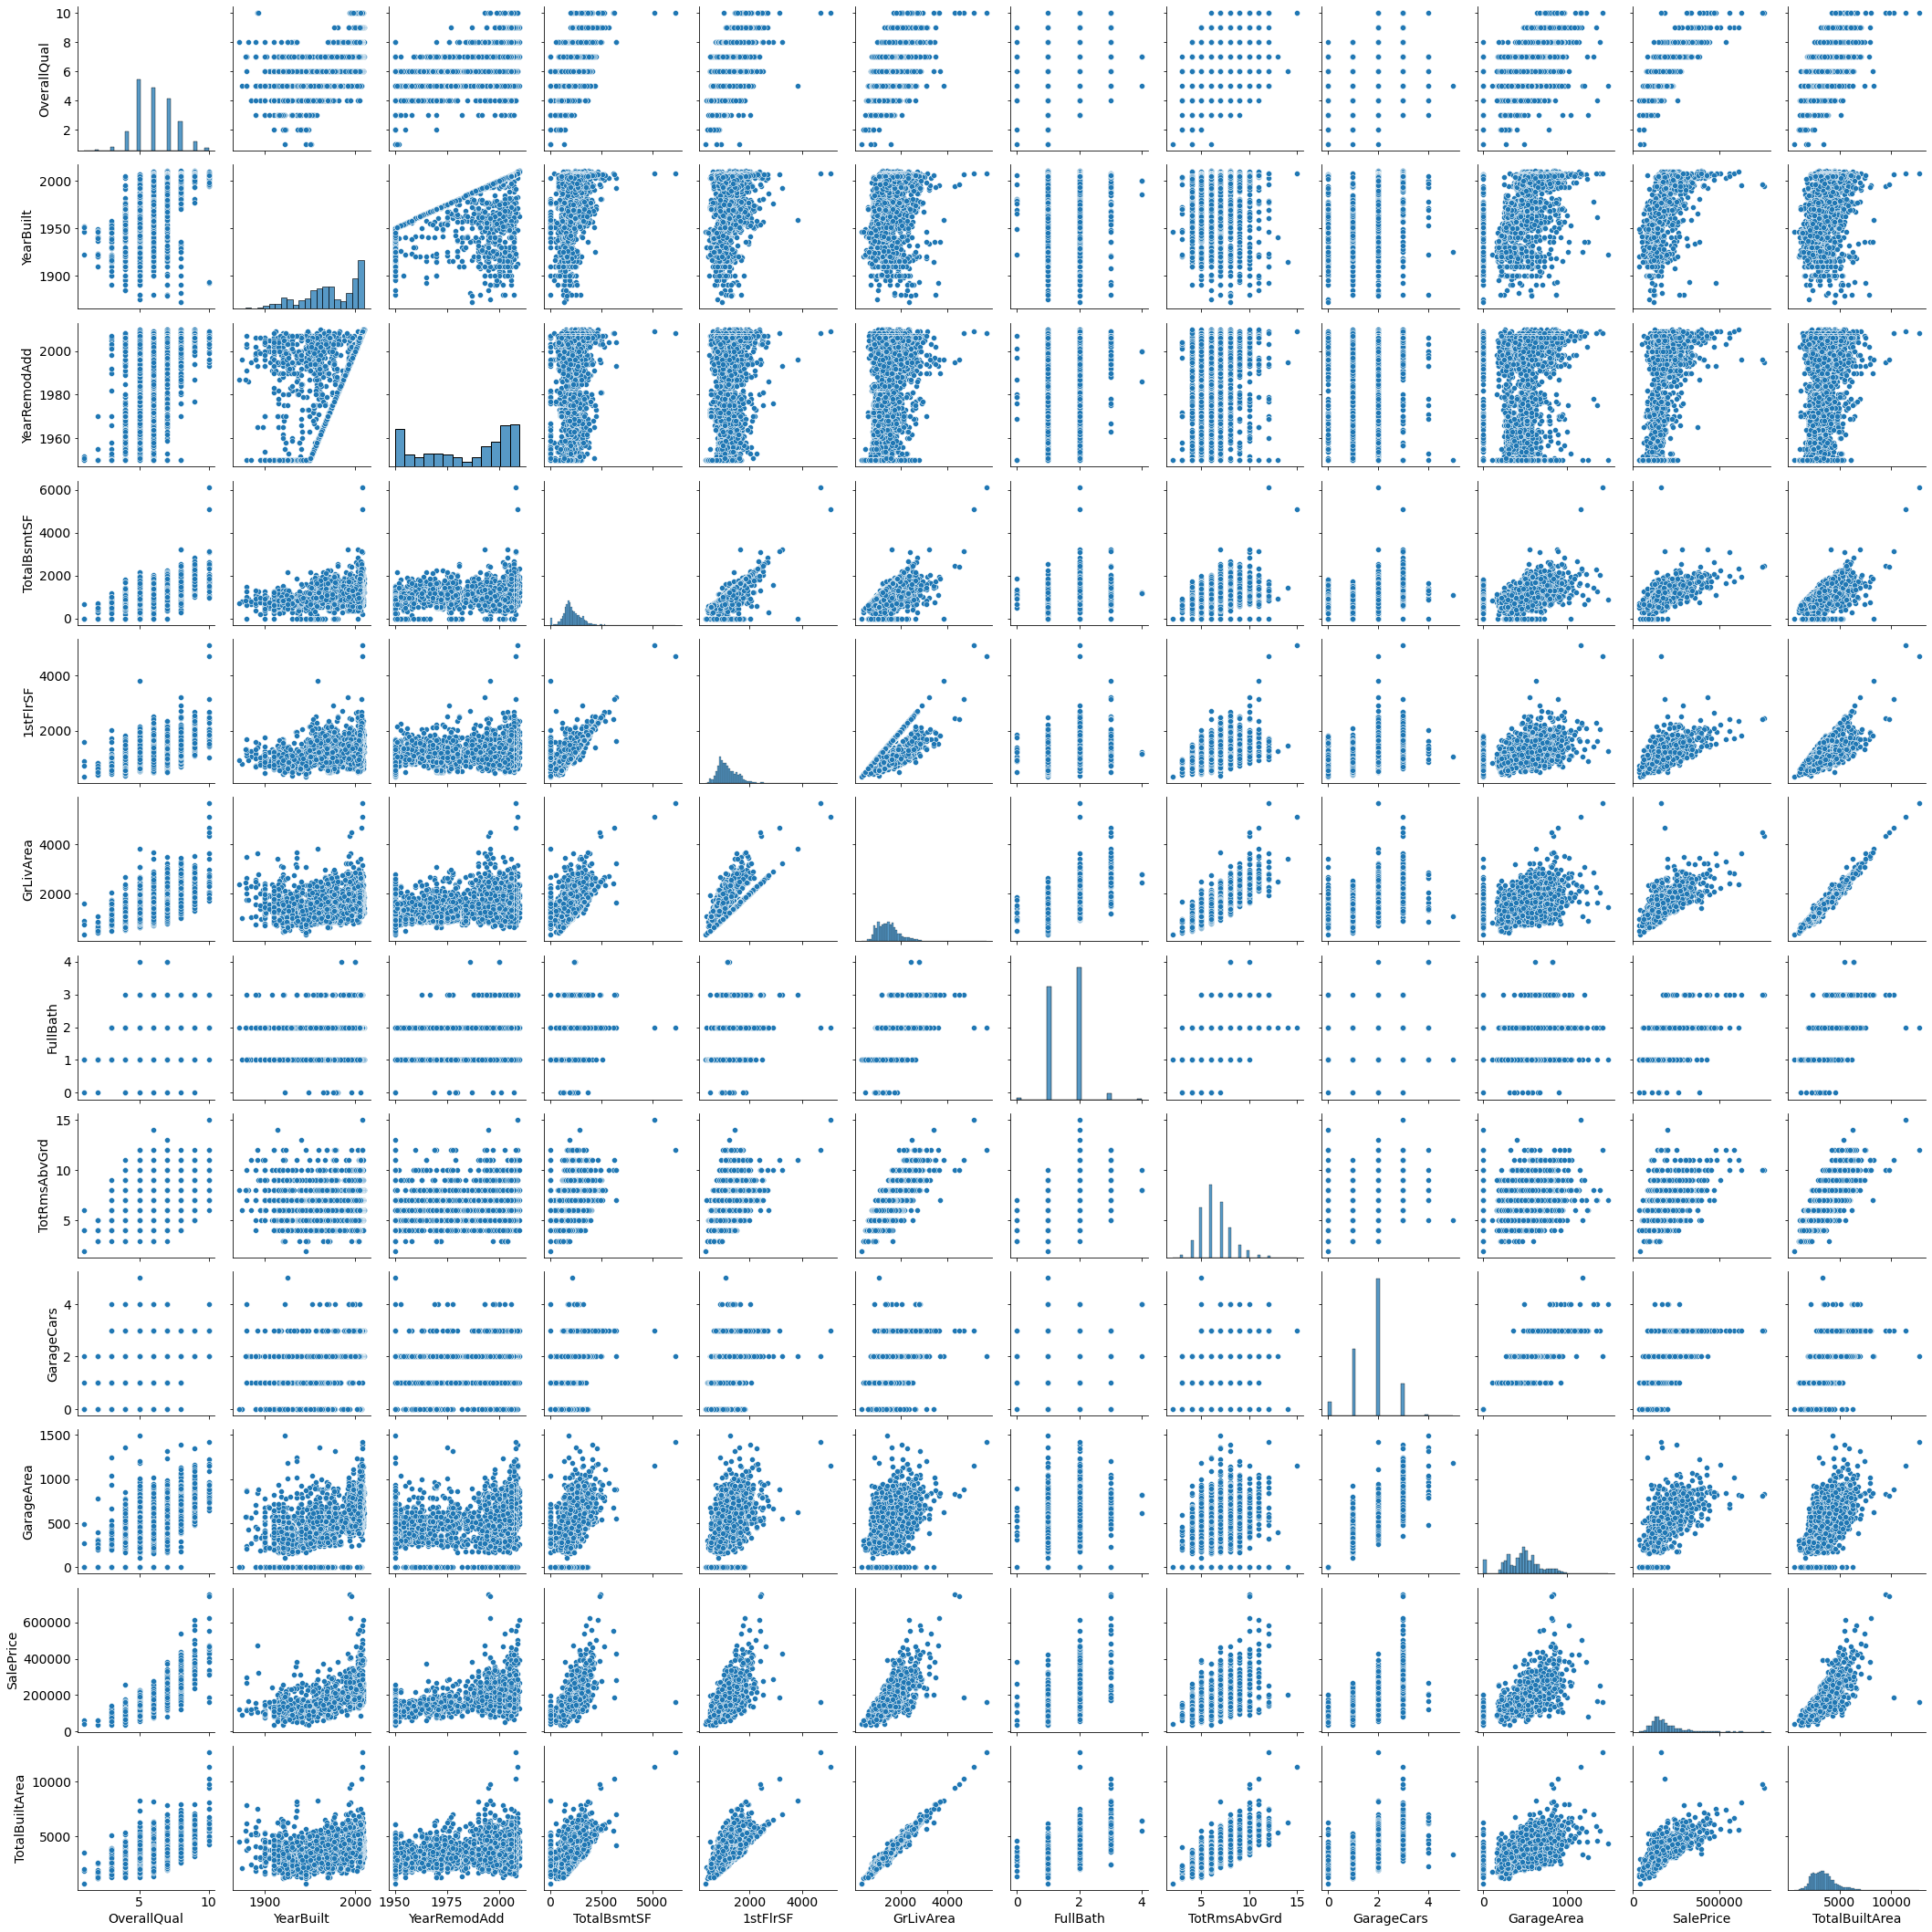

In [32]:
#Lista com as variáveis com correlação igual ou maior a 50%
variaveis_maior_corr= dados_corr.index.to_list()

#Dispersão destas variáveis entre si
sns.pairplot(dados[variaveis_maior_corr]);

#### Exercício 2 - Uma vez feita a seleção dos atributos, realize testes para entender se há mais de uma distribuição contida em seu `dataset`. faça agrupamentos se julgar necessário.

GarageCars (quantos carros cabem na garagem) e GarageArea (Area da garagem) não faz sentido, pois são a mesma informação dada em unidades diferentes. Nesse caso teríamos um problema de multicolinearidade e o nosso modelo seria afetado negativamente por não saber qual das variáveis considerar no cálculo. A mesma ideia vale para TotalBsmtSF e 1stFlrSF (vamos retirar 1stFlrSF).

In [33]:
#Novo dataframe somente com as variáveis com correlação linear maior ou igual a 50%
dados_preditoras = dados[variaveis_maior_corr]

#Correlações do novo dataset gerado
dados_preditoras.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,TotalBuiltArea
OverallQual,1.000000,0.597554,0.571532,0.549294,0.479152,0.575126,0.528483,0.389761,0.600744,0.565122,0.790982,0.625160
YearBuilt,0.597554,1.000000,0.612235,0.408515,0.310814,0.242666,0.471169,0.114280,0.538074,0.480735,0.522897,0.315376
YearRemodAdd,0.571532,0.612235,1.000000,0.298107,0.242245,0.316972,0.457980,0.198250,0.426022,0.376765,0.507101,0.358150
TotalBsmtSF,0.549294,0.408515,0.298107,1.000000,0.801670,0.445276,0.327762,0.282126,0.437997,0.486067,0.613581,0.492645
1stFlrSF,0.479152,0.310814,0.242245,0.801670,1.000000,0.562538,0.373077,0.391782,0.440540,0.492011,0.605852,0.598411
GrLivArea,0.575126,0.242666,0.316972,0.445276,0.562538,1.000000,0.630286,0.808354,0.489933,0.485469,0.708624,0.984368
FullBath,0.528483,0.471169,0.457980,0.327762,0.373077,0.630286,1.000000,0.527337,0.479988,0.408487,0.560664,0.642543
TotRmsAbvGrd,0.389761,0.114280,0.198250,0.282126,0.391782,0.808354,0.527337,1.000000,0.358053,0.328687,0.533723,0.782713
GarageCars,0.600744,0.538074,0.426022,0.437997,0.440540,0.489933,0.479988,0.358053,1.000000,0.889700,0.640409,0.611250
GarageArea,0.565122,0.480735,0.376765,0.486067,0.492011,0.485469,0.408487,0.328687,0.889700,1.000000,0.623431,0.627711


In [34]:
#Retirando variáveis que levariam à multicolinearidade (possuem a mesma informação em unidades diferentes) do modelo
with pd.option_context('mode.chained_assignment', None):
  dados_preditoras.drop(['GarageCars', '1stFlrSF', 'GrLivArea', 'GarageArea'], axis= 1, inplace= True)

dados_preditoras.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,TotRmsAbvGrd,SalePrice,TotalBuiltArea
OverallQual,1.000000,0.597554,0.571532,0.549294,0.528483,0.389761,0.790982,0.625160
YearBuilt,0.597554,1.000000,0.612235,0.408515,0.471169,0.114280,0.522897,0.315376
YearRemodAdd,0.571532,0.612235,1.000000,0.298107,0.457980,0.198250,0.507101,0.358150
TotalBsmtSF,0.549294,0.408515,0.298107,1.000000,0.327762,0.282126,0.613581,0.492645
FullBath,0.528483,0.471169,0.457980,0.327762,1.000000,0.527337,0.560664,0.642543
TotRmsAbvGrd,0.389761,0.114280,0.198250,0.282126,0.527337,1.000000,0.533723,0.782713
SalePrice,0.790982,0.522897,0.507101,0.613581,0.560664,0.533723,1.000000,0.756478
TotalBuiltArea,0.625160,0.315376,0.358150,0.492645,0.642543,0.782713,0.756478,1.000000


In [35]:
#Medidas estatísticas do dataset remanescente 
EDA(dados_preditoras)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Median,Max,Min,STD
OverallQual,0,0.0,int64,2919,5,6.09,6.0,10.0,1.0,1.41
YearBuilt,0,0.0,int64,2919,10,1971.31,1973.0,2010.0,1872.0,30.29
YearRemodAdd,0,0.0,int64,2919,664,1984.26,1993.0,2010.0,1950.0,20.89
TotalBsmtSF,1,0.0,float64,2918,1059,1051.78,989.5,6110.0,0.0,440.77
FullBath,0,0.0,int64,2919,1757,1.57,2.0,4.0,0.0,0.55
TotRmsAbvGrd,0,0.0,int64,2919,14,6.45,6.0,15.0,2.0,1.57
SalePrice,1459,0.5,float64,1460,118,180921.20,163000.0,755000.0,34900.0,79442.50
TotalBuiltArea,1,0.0,float64,2918,61,3469.47,3346.0,12702.0,668.0,1129.94


Teste de normalidade da distribuição dos preços

'A distribuição é normal'

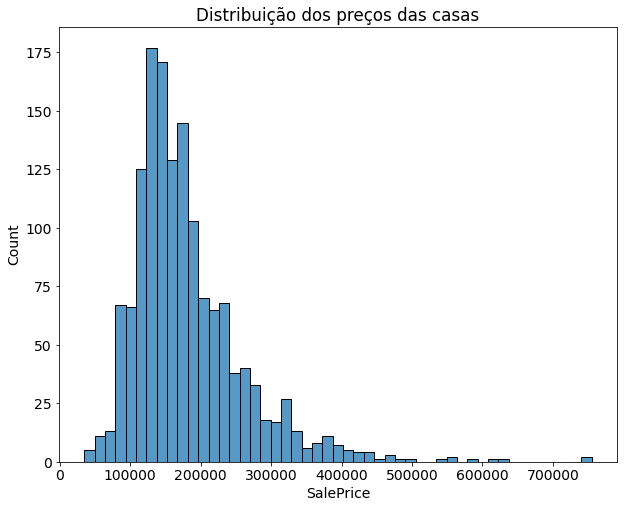

In [36]:
#Histograma
sns.histplot(dados_preditoras['SalePrice'])

#Título
plt.title('Distribuição dos preços das casas');

#Indicando se a distribuição é ou não normal
normal(dados_preditoras, 'SalePrice')

Como indicado no caderno de prática independente da aula 1 de modelagem estatística: Os preços das casas estão concentrados em valores de 100 a 200 mil dólares tendo algumas poucas casas com valores mais altos (acima de 500 mil dólares). Apesar desta cauda na direita da distribuição, nosso teste estístico está nos indicando que temos uma distribuição normal: tal fator provavelmente nos ajudaria no momento de construção de um modelo linear já que um de seus pressupostos é a normalidade das distribuições utilizadas nele. Precisamos ressaltar que, porém, temos 50% dos dados faltando em preço das casas. Nesse sentido, parece que estamos perdendo muito de variação e comportamento do preço das casas e não saberíamos se de fato o modelo teria boa performance em exemplos reais após sua construção.

Vamos optar por retirar esses dados, portanto.

In [37]:
#Retirando valores nulos do dataframe que será utilizado para primeira construção do modelo
with pd.option_context('mode.chained_assignment', None):
  dados_preditoras.dropna(inplace= True)

print(f'Total de linhas depois da remoção: {dados_preditoras.shape[0]}')

Total de linhas depois da remoção: 1460


Acho importante também criarmos uma nova coluna utilizando as variáveis ano de construção e ano de renovação. Como vimos, temos algumas casas que não foram renovadas e, portanto, o ano de construção e renovação é o mesmo. Para evitar que se perca alguma informação, vamos criar uma nova coluna indicando o tempo (anos) em que a casa fora renovada. Se ela não foi, teremos o valor de 0, se foi, teremos a diferença entre o ano de construção e renovação. Isto parece fazer maior sentido para ser implementado no modelo de regressão linear.

In [38]:
#Crianco nova coluna com o tempo (anos) demorado até que a casa foi renovada
#Aqui estamos indicando ao pandas para não levantar um alerta quando criamos a nova coluna
#Mas antes disso conferi se o código estava tendo o resultado esperado
with pd.option_context('mode.chained_assignment', None):
  dados_preditoras['years_till_renovation'] = dados_preditoras['YearRemodAdd'] - dados_preditoras['YearBuilt']

  #Retirando coluna YearRemodAdd
  dados_preditoras.drop('YearRemodAdd', inplace=True, axis= 1)

dados_preditoras.head()

,OverallQual,YearBuilt,TotalBsmtSF,FullBath,TotRmsAbvGrd,SalePrice,TotalBuiltArea,years_till_renovation
0,7,2003,856.0,2,8,208500.0,3968.0,0
1,6,1976,1262.0,2,6,181500.0,2984.0,0
2,7,2001,920.0,2,6,223500.0,4180.0,1
3,7,1915,756.0,1,7,140000.0,4076.0,55
4,8,2000,1145.0,2,9,250000.0,5232.0,0


#### Exercício 3 - Realize o pré-processamento de seus dados para a subseqüênte modelização, efetuando a separação em subconjuntos de treino e teste. Crie um modelo para descrever a variável `target` de seu conjunto de dados original.

1) Separar um dataframe com as variáveis independentes e array numpy com a variável resposta (preço de venda das casas)

2) Separar os dados em subconjuntos de treino e de teste

3) Padronizar os dados das variáveis independentes com o z_score: Vamos normalizar os dados para ter nossas variáveis preditoras na mesma unidade, neste caso, seus desvios em relação a media da própria distribuição: o z-score

4) Treinar modelo

Separação das variáveis preditoras e variável resposta

In [39]:
#Variáveis que utilizaremos para a previsão
var_independentes = dados_preditoras.columns.to_list()

#Retirando variável resposta
var_independentes.remove('SalePrice')

#Dataframe com as variáveis que utilizaremos para revisão
X= dados_preditoras[var_independentes]

#Variável que queremos prever
y= dados_preditoras['SalePrice']

Padronização das variáveis preditoras com Z_score

In [40]:
#Instanciando objeto StandardScaler
scaler = StandardScaler().fit(X)

#Z-Scores dos dados de treino e de teste
x_treino_norm = scaler.transform(X)

Separação dados de treino e de teste e treinamento do modelo

In [41]:
#Separação de dados de treino (70%) e de teste (30%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X.values, y, test_size = 0.3)

#Instanciando objeto Linear Regression e ajustando modelo com os dados de treino
reg = LinearRegression().fit(X_treino, y_treino)

#### Exercício 4 - Analize os resultados obtidos, observando os coeficientes calculados e as previsões realizadas. Avalie a qualidade de sua modelização com métricas apropriadas.

In [42]:
#R² do nosso modelo
print(f'R²: {reg.score(X_treino, y_treino)}')

#Coeficientes de acordo com a variável
importancia_df = pd.DataFrame()
importancia_df['colunas'] = var_independentes
importancia_df['importancia'] = list(reg.coef_)
print(importancia_df)

R²: 0.7497560430388819
                 colunas   importancia
0            OverallQual  20727.166456
1              YearBuilt    659.899297
2            TotalBsmtSF     28.671783
3               FullBath  -5742.771220
4           TotRmsAbvGrd    965.707888
5         TotalBuiltArea     24.324286
6  years_till_renovation    331.941439


O nosso R² nos retorna um valor promissor. Esta métrica nos indica (entre 0 e 1) o quão bem nossas variáveis estão explicando nossa variável resposta.Quanto mais próximo de 1, ou 100%, melhor as variveis em questão estão explicando a variação na variável que queremos prever. Nesse sentido, temos um nível de explicabilidade de aproximadamente 75%, o que é um valor bom, ainda mais se pensarmos que não chegamos numa fase de otimização dos coeficientes do modelo a partir de técnicas como o [Gradiente Descendente](https://towardsdatascience.com/gradient-descent-explained-9b953fc0d2c#:~:text=Gradient%20Descent%20is%20an%20optimizing,f(x)%20using%20iteration.&text=Gradient%20Descent%20on%20Cost%20function.).

Coeficientes:

Os coeficientes nos indicam uma tendência de comportamento (quanto diminui ou aumenta) a nossa variável resposta (neste caso o preço de venda das casas) com a subida de algumas unidades na variável dependente em questão.

Nesse sentido, vamos esmiuçar os valores apresentados pelos coeficientes calculados:

  a) OverallQual: A qualidade do material e acabamento da casa demonstrou ter a maior correlação linear positiva com o valor da casa. O nosso coeficiente nos indica que a medida que esta variável cresce, a tendência é da subida do preço da casa em $20.727 dólares. O que reafirma a grande importância de tal aspecto para o maior valor da casa.

  b) YearBuilt: Está nos indicando que com o aumento (quanto mais nova a casa, neste caso) a tendência é a casa ter um valor maior de $659 dólares. Isto nos indica que as casas mais novas parecem ter maiores valores ("regra" que para outros produtos nem sempre se confirma).

  c) TotalBsmtSF: Está nos indicando que conforme o aumento do total da base da casa, a tendência é um aumento considerável de $28 dólares.

  d) FullBath: Está nos indicando (de forma contra intuitiva) que conforme o aumento do número de banheiros completos da casa, a tendência é a diminuição do preço em $5.742 dólares.

  e) TotRmsAbvGrd:  nos indicando que conforme o aumento do número de quartos da casa, a tendência é o aumento do preço em $965 dólares
  
  f) TotalBuiltArea:  Aqui, como já havia nos indicado uma forte correlação positiva, o coeficiente está nos indicando que conforme o aumento da área total de construção da casa a tendência é o aumento de $24 dólares.
  
  g) years_till_renovation: Nos indica que conforme o aumento do tempo que a casa demorou a ser renovada, o seu preço tende a aumentar $331 dólares. Não pe um valor tão expressivo, mas importante pra percerbemos comportamentos.


OBS -> É importante ressaltar que estamos analisando os coeficientes analisados num primeiro momento. Ao meu ver, para que tenhamos maior confiabilidade nesses valores como descrições de comportamento do preço das casas em relação a cada variável preditora, precisaríamos antes aplicar alguma técnica de otimização destes coeficientes, isto é, encontrar seus valores onde dão os menores erros nas predições do modelo.

Vamos analisar qual a performance do modelo observando o erro medio absoluto (sem destacar os outliers). Em media, seja pra cima ou para baixo, em quantos dólares o modelo está errando o preço das casas?

In [52]:
#Predições do modelo
y_pred = reg.predict(X_teste)

#Erro medio absoluto do modelo
erro_abs_medio = mean_absolute_error(y_teste, y_pred)
print(f'Erro absoluto medio: {erro_abs_medio:.2f}')

Erro absoluto medio: 0.13


Em media o modelo está errando $23.000 dólares:  é um valor considerável de erro.

#### Exercício 5 - Estude seus resultados e proponha métodos para aprimorar sua modelização.

Vamos resumir a coluna de ano de construção com a proporção que aquele ano aparece no dataset. Após isso vamos utilizar a técnica de transformação da variável target em seus valores logaritimicos.

In [44]:
frequencia_anos = pd.DataFrame()
frequencia_anos['YearBuilt'] = dados_preditoras['YearBuilt'].value_counts(normalize = True).index.tolist() #index, ano de construção
frequencia_anos['freq_year'] = dados_preditoras['YearBuilt'].value_counts(normalize = True).tolist() #valor de frequência que aquele ano teve casas construídas
frequencia_anos.head()

,YearBuilt,freq_year
0,2006,0.045890
1,2005,0.043836
2,2004,0.036986
3,2007,0.033562
4,2003,0.030822


Junção dos dataframes dados_preditoras e frequencia_anos com o método .merge() que mescla DataFrames ou objetos nomeados do tipo Series com uma junção de estilo de banco de dados. Depois podemos eliminar a coluna YearBuilt.

In [45]:
dados_preditoras = dados_preditoras.merge(frequencia_anos, 
                                on = 'YearBuilt'
                               )
dados_preditoras.drop(labels= 'YearBuilt', axis= 1, inplace= True)

dados_preditoras.head()

,OverallQual,TotalBsmtSF,FullBath,TotRmsAbvGrd,SalePrice,TotalBuiltArea,years_till_renovation,freq_year
0,7,856.0,2,8,208500.0,3968.0,0,0.030822
1,7,1434.0,1,6,239686.0,4968.0,0,0.030822
2,7,1453.0,2,7,226000.0,3516.0,0,0.030822
3,8,1053.0,2,9,250000.0,4632.0,1,0.030822
4,9,1572.0,2,10,412500.0,6062.0,1,0.030822


In [46]:
dados_preditoras['price_log'] = np.log(dados_preditoras['SalePrice'])
dados_preditoras['price_log'].head()

0    12.247694
1    12.387085
2    12.328290
3    12.429216
4    12.929991
Name: price_log, dtype: float64

Separando variáveis preditoras e variável resposta

In [47]:
#Variáveis que utilizaremos para a previsão
var_independentes = dados_preditoras.columns.to_list()

#Retirando variável resposta
var_independentes.remove('SalePrice')
var_independentes.remove('price_log')

#Dataframe com as variáveis que utilizaremos para revisão
X= dados_preditoras[var_independentes]

#Variável que queremos prever (o valor logaritimico dos preços)
y= dados_preditoras['price_log']

Padronizando os dados com Z_Score. Vamos utilziar essa maneira de escalonar os dados, pois queremos que o modelo leve em consideração as casas consideradas outliers em seus atributos. O z_score acaba sendo um escalonamento recomendado nesse caso.

In [48]:
#Instanciando objeto StandardScaler
scaler = StandardScaler().fit(X)

#Z-Scores das variáveis preditoras
X_escalonado = scaler.transform(X)

In [49]:
#Separação de dados de treino (70%) e de teste (30%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X.values, y, test_size = 0.3)

#Instanciando objeto Linear Regression e ajustando modelo com os dados de treino
reg = LinearRegression().fit(X_treino, y_treino)

#R² do nosso modelo
print(f'R²: {reg.score(X_treino, y_treino)}')

R²: 0.7741191121515582


Vemos que nosso R² já demonstra uma melhora significativa, isto é, o nível de explicação das variáveis com as transformações feitas agora são melhores.

Vamos avaliar as métricas de erro do modelo.

In [50]:
#Predições do modelo
y_pred = reg.predict(X_teste)

#Erro medio absoluto do "novo" modelo
erro_abs_medio = mean_absolute_error(y_teste, y_pred)
print(f'Erro absoluto medio: {erro_abs_medio}')

Erro absoluto medio: 0.13003237092382322


Erro medio absoluto do modelo é bem próximo de zero. Podemos dizer que as mudanças feitas tiveram uma grande melhoria no modelo. Lembrando que nao fizemos a otimização dos coeficientes do modelo utilizando técnicas como o gradiente descendente, por exemplo. Nesse sentido podemos dizer que temos um modelo muito bom pra aprimorar e pensar em colocar em "produção".

Vamos avaliar como o modelo lidou com aquelas casas que podem ser consideradas outliers em seus atributos.

In [51]:
#Erro quadrático medio do "novo" modelo
erro_quad_medio = np.sqrt(mean_squared_error(y_teste, y_pred))
print(f'Erro quadrático medio: {erro_quad_medio}')

Erro quadrático medio: 0.1822879046307573
